# $\mathrm{\mathbb{P}}$ signal

**Movitation:** How much signal efficiency does this actually buy us?

In [39]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.preprocessing import StandardScaler

import os
os.sys.path+= ['../RRevolution/code/','../PAG-opt/','../code/']
from analysis import getXhh
# from utils import mcToYr

from eventDisplays import rainbow_text

from plots import draw_SR, draw_VR, draw_CR


import logging
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [36]:
np.sum(sdf.trigger)/len(sdf)

1.0

In [3]:
physicsSample = 'SMNR'
mc='mc16d'

In [20]:
sdf = pd.concat([pd.read_hdf(f'../data/{physicsSample}_{mc}_PFlow-APR2020-5jets/df_SM_2b_{s}_3b.h5') for s in ['even','odd']])

In [22]:
# dataDir = '../data/SeanFiles/revdEta/'
# f = uproot.open(f'{dataDir}/pairAGraph_SM_2b_all_{mc}.root')
# sdf = f['sig'].pandas.df()

In [21]:
sdf.head()

eventNumber  nresolvedJets  mcEventWeight  weight_pileup  rand_run_nr  \
entry                                                                          
1          1941934              6       0.031172       1.157816       338933   
3          1941621              9       0.031172       1.069462       330294   
7          1940021              5      -0.031172       0.997578       336915   
13         1941304              4       0.031172       1.172122       333469   
19         1940402              6       0.031172       0.883180       331239   

            j0_pt    j0_eta    j0_phi        j0_E  j0_Db  ...     w_k11  \
entry                                                     ...             
1      177.026642  0.716126 -3.064180  225.759949      5  ...  0.003855   
3      163.804291  0.543150  1.787875  188.962265      5  ...  0.008376   
7       96.130928  0.997893 -0.847785  148.642654      5  ... -0.004507   
13     114.343376  1.830857  2.239976  366.443390      5  ...  0.007459   
19     148.057602  0.747926 -0.012336  192.171143      5  ...  0.004997   

          w_k12     w_k13     w_k14     w_k15     w_k16     w_k17     w_k18  \
entry                                                                         
1      0.004907  0.006089  0.007401  0.008842  0.010412  0.012113  0.013942   
3      0.010558  0.012993  0.015681  0.018623  0.021819  0.025267  0.028969   
7     -0.005737 -0.007118 -0.008652 -0.010336 -0.012172 -0.014160 -0.016299   
13     0.009426  0.011626  0.014058  0.016722  0.019618  0.022746  0.026106   
19     0.006317  0.007794  0.009427  0.011217  0.013163  0.015265  0.017524   

          w_k19     w_k20  
entry                      
1      0.015902  0.017991  
3      0.032924  0.037132  
7     -0.018590 -0.021032  
13     0.029698  0.033522  
19     0.019939  0.022511  

[5 rows x 208 columns]

In [14]:
for c in sdf.columns:
    print(c)

eventNumber
nresolvedJets
mcEventWeight
weight_pileup
rand_run_nr
j0_pt
j0_eta
j0_phi
j0_E
j0_Db
j0_sf
j1_pt
j1_eta
j1_phi
j1_E
j1_Db
j1_sf
j2_pt
j2_eta
j2_phi
j2_E
j2_Db
j2_sf
j3_pt
j3_eta
j3_phi
j3_E
j3_Db
j3_sf
j4_pt
j4_eta
j4_phi
j4_E
j4_Db
j4_sf
njets
trigger
mc_sf
ntag
truth_mhh
truth_pthh
h0_pt
h0_eta
h0_phi
h0_barcode
h1_pt
h1_eta
h1_phi
h1_barcode
b0_pt
b0_eta
b0_phi
b0_parent_barcode
b1_pt
b1_eta
b1_phi
b1_parent_barcode
b2_pt
b2_eta
b2_phi
b2_parent_barcode
b3_pt
b3_eta
b3_phi
b3_parent_barcode
b0_jidx
b0_drMatch
b1_jidx
b1_drMatch
b2_jidx
b2_drMatch
b3_jidx
b3_drMatch
j0_bidx
j1_bidx
j2_bidx
j3_bidx
j4_bidx
j0_drMatch
j1_drMatch
j2_drMatch
j3_drMatch
j4_drMatch
correctPair
sameParent
unique
dRmatch
goodJets
ml_j0_pt
ml_j1_pt
ml_j2_pt
ml_j3_pt
ml_j4_pt
ml_j0_eta
ml_j1_eta
ml_j2_eta
ml_j3_eta
ml_j4_eta
ml_j0_phi
ml_j1_phi
ml_j2_phi
ml_j3_phi
ml_j4_phi
ml_j0_E
ml_j1_E
ml_j2_E
ml_j3_E
ml_j4_E
ml_j0_Db
ml_j1_Db
ml_j2_Db
ml_j3_Db
ml_j4_Db
max_prob
predPair
idx_HCa_j0
idx_HCa_j1
i

In [25]:
n = 40
r = (200,1200)

In [80]:
x0,y0 = 120, 110
x1,y1 = 124, 117

In [42]:
sdf['Xhh_new'] = getXhh(*sdf[['m_h1','m_h2']].values.T,x1, y1)

In [46]:
psymb = '$\mathrm{\mathbb{P}}$'

In [65]:
text = "$\mathbf{ATLAS}$ Simulation Internal\n"
text += f"{physicsSample[:2]} {mc}, APR20 MNT"
text += f"\n4b {psymb}($p_T$ sort), "+"$X_{wt}$ > 1.5"

In [70]:
figDir = f'figures/{physicsSample}_{mc}-5jets/SM_2b'

10.887801613396523
1.8255783852495895 1.1676719001752722
11.484901200654228
2.0197462887950017 1.1758610068565456


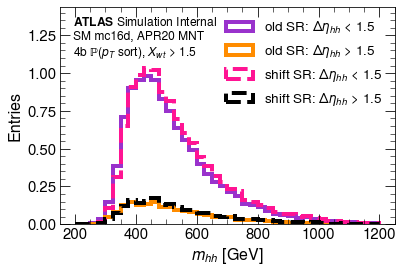

In [72]:
mi = (sdf.ntag>=4) & (sdf.kinematic_region ==0) & (sdf.X_wt > 1.5)
mj = (sdf.ntag>=4) & (sdf.Xhh_new < 1.6) & (sdf.X_wt > 1.5)

s0,_,_ = plt.hist(sdf.loc[mi & (sdf.abs_deta_hh < 1.5),'m_hh'],n,r,
         histtype='step',color='darkorchid',lw=4,
         label='old SR: $\Delta \eta_{hh}$ < 1.5',
         weights=sdf.loc[mi & (sdf.abs_deta_hh < 1.5),'mc_sf'])
print(np.sum(s0))
s1,_,_ =plt.hist(sdf.loc[mi & (sdf.abs_deta_hh > 1.5),'m_hh'],n,r,
         histtype='step',color='darkorange',lw=4,
         label='old SR: $\Delta \eta_{hh}$ > 1.5',
         weights=sdf.loc[mi & (sdf.abs_deta_hh > 1.5),'mc_sf'])
print(np.sum(s1), (np.sum(s0)+np.sum(s1))/np.sum(s0))

plt.xlabel('$m_{hh}$ [GeV]',fontsize=16)
plt.ylabel('Entries',fontsize=16)
plt.legend(fontsize=13.5)

ax = plt.gca()
plt.text(0.04,.96,text,ha='left',va='top',transform=ax.transAxes,fontsize=12)
_,ymax = plt.ylim()
plt.ylim(0,1.4*ymax)

plt.savefig(f'{figDir}/m_hh_SR_old.pdf',bbox_inches='tight')

s0,_,_ = plt.hist(sdf.loc[mj & (sdf.abs_deta_hh < 1.5),'m_hh'],n,r,
         histtype='step',color='deeppink',lw=4,ls='--',
         label='shift SR: $\Delta \eta_{hh}$ < 1.5',
         weights=sdf.loc[mj & (sdf.abs_deta_hh < 1.5),'mc_sf'])
print(np.sum(s0))
s1,_,_ =plt.hist(sdf.loc[mj & (sdf.abs_deta_hh > 1.5),'m_hh'],n,r,
         histtype='step',color='k',lw=4,ls='--',
         label='shift SR: $\Delta \eta_{hh}$ > 1.5',
         weights=sdf.loc[mj & (sdf.abs_deta_hh > 1.5),'mc_sf'])
print(np.sum(s1), (np.sum(s0)+np.sum(s1))/np.sum(s0))

plt.legend(fontsize=13.5)

plt.savefig(f'{figDir}/m_hh_SR_old_and_new.pdf',bbox_inches='tight')

In [74]:
mi = (sdf.ntag>=4) & (sdf.kinematic_region ==0) & (sdf.X_wt > 1.5)
mj = (sdf.ntag>=4) & (sdf.Xhh_new < 1.6) & (sdf.X_wt > 1.5)

s0,_,_ = plt.hist(sdf.loc[mi & (sdf.abs_deta_hh < 1.5),'m_hh'],n,r,
         histtype='step',color='darkorchid',lw=4,
         label='old SR: $\Delta \eta_{hh}$ < 1.5',
         weights=sdf.loc[mi & (sdf.abs_deta_hh < 1.5),'mc_sf'])
print(np.sum(s0))
s1,_,_ =plt.hist(sdf.loc[mi & (sdf.abs_deta_hh > 1.5),'m_hh'],n,r,
         histtype='step',color='darkorange',lw=4,
         label='old SR: $\Delta \eta_{hh}$ > 1.5',
         weights=sdf.loc[mi & (sdf.abs_deta_hh > 1.5),'mc_sf'])
print(np.sum(s1), (np.sum(s0)+np.sum(s1))/np.sum(s0))

plt.xlabel('$m_{hh}$ [GeV]',fontsize=16)
plt.ylabel('Entries',fontsize=16)
plt.legend(fontsize=13.5)

ax = plt.gca()
plt.text(0.04,.96,text,ha='left',va='top',transform=ax.transAxes,fontsize=12)
_,ymax = plt.ylim()
plt.ylim(0,1.4*ymax)

plt.savefig(f'{figDir}/m_hh_SR_old.pdf',bbox_inches='tight')

s0,_,_ = plt.hist(sdf.loc[mj & (sdf.abs_deta_hh < 1.5),'m_hh'],n,r,
         histtype='step',color='deeppink',lw=4,ls='--',
         label='shift SR: $\Delta \eta_{hh}$ < 1.5',
         weights=sdf.loc[mj & (sdf.abs_deta_hh < 1.5),'mc_sf'])
print(np.sum(s0))
s1,_,_ =plt.hist(sdf.loc[mj & (sdf.abs_deta_hh > 1.5),'m_hh'],n,r,
         histtype='step',color='k',lw=4,ls='--',
         label='shift SR: $\Delta \eta_{hh}$ > 1.5',
         weights=sdf.loc[mj & (sdf.abs_deta_hh > 1.5),'mc_sf'])
print(np.sum(s1), (np.sum(s0)+np.sum(s1))/np.sum(s0))

plt.legend(fontsize=13.5)

plt.savefig(f'{figDir}/m_hh_SR_old_and_new.pdf',bbox_inches='tight')

1.0466666666666666

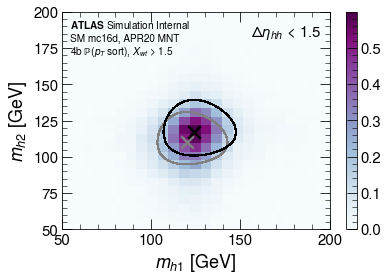

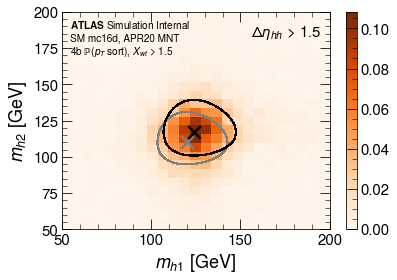

In [86]:
m = (sdf.ntag>=4) & (sdf.X_wt > 1.5)

for mk, cmap,l,t in zip([(sdf.abs_deta_hh < 1.5), (sdf.abs_deta_hh > 1.5)], ['BuPu','Oranges'],
                        ['$\Delta \eta_{hh}$ < 1.5','$\Delta \eta_{hh}$ > 1.5'],
                        ['deta','rev']):
    
    plt.figure()
    plt.hist2d(*sdf.loc[m & mk,['m_h1','m_h2']].values.T,25,[(50,200),(50,200)],
               cmap=cmap,weights=sdf.loc[m & mk,'mc_sf'])
    plt.colorbar()
    plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
    plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)

    ax = plt.gca()
    plt.text(.97,.95,l,transform=ax.transAxes,ha='right',va='top',fontsize=15)
    plt.text(0.03,0.97,text,transform=ax.transAxes,ha='left',va='top',fontsize=10)

    # Overlay our region definitions
    for xi,yi,c,rTag in zip([x0,x1],[y0,y1],['grey','k'],['old','old_new']):

        plt.scatter([xi],[yi],160,marker='x',color=c)
        #for f in [draw_SR,draw_VR,draw_CR]:
        x,y = draw_SR(xi,yi)
        plt.plot(x,y,c,lw=1.2)

        plt.savefig(f'{figDir}/massplane_4b_{t}.pdf', bbox_inches='tight')

